In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
sns.set_context("paper", font_scale=2)  

/users/christofor.eseroglou/.conda/envs/chris/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
data = pd.read_csv('../catalog.csv')
data = data[(data['kT']>0.9)]

In [21]:
data = data[(data['N']==100_000)]

In [22]:
data

,id,N,L,steps,block_size,dt,gamma,A,intg,run_time,rho,kT
570,3000,100000,100.0,10000000,1000,0.01,0.001,3.0,langevin,6506.514705,0.100000,0.998442
571,2998,100000,69.3,10000000,1000,0.01,0.001,3.0,langevin,8004.068396,0.300469,1.000746
572,2996,100000,46.4,10000000,1000,0.01,0.001,3.0,langevin,10615.854214,1.001028,0.995622
573,2997,100000,46.4,10000000,1000,0.01,0.001,3.0,dpd,10687.059393,1.001028,0.998655
574,3002,100000,46.4,10000000,1000,0.01,0.010,3.0,langevin,10586.630195,1.001028,0.999033
575,3003,100000,46.4,10000000,1000,0.01,0.010,3.0,dpd,11278.748268,1.001028,1.002019
576,3007,100000,100.0,10000000,1000,0.01,0.010,3.0,dpd,5870.076941,0.100000,0.999167
577,3006,100000,100.0,10000000,1000,0.01,0.010,3.0,langevin,6404.009599,0.100000,0.997808
578,3004,100000,69.3,10000000,1000,0.01,0.010,3.0,langevin,8003.900947,0.300469,0.995562
579,3005,100000,69.3,10000000,1000,0.01,0.010,3.0,dpd,8024.558587,0.300469,1.002087


In [23]:
data['run_time'] = data['run_time'].apply(lambda x: x/3600)

In [24]:
data

,id,N,L,steps,block_size,dt,gamma,A,intg,run_time,rho,kT
570,3000,100000,100.0,10000000,1000,0.01,0.001,3.0,langevin,1.807365,0.100000,0.998442
571,2998,100000,69.3,10000000,1000,0.01,0.001,3.0,langevin,2.223352,0.300469,1.000746
572,2996,100000,46.4,10000000,1000,0.01,0.001,3.0,langevin,2.948848,1.001028,0.995622
573,2997,100000,46.4,10000000,1000,0.01,0.001,3.0,dpd,2.968628,1.001028,0.998655
574,3002,100000,46.4,10000000,1000,0.01,0.010,3.0,langevin,2.940731,1.001028,0.999033
575,3003,100000,46.4,10000000,1000,0.01,0.010,3.0,dpd,3.132986,1.001028,1.002019
576,3007,100000,100.0,10000000,1000,0.01,0.010,3.0,dpd,1.630577,0.100000,0.999167
577,3006,100000,100.0,10000000,1000,0.01,0.010,3.0,langevin,1.778892,0.100000,0.997808
578,3004,100000,69.3,10000000,1000,0.01,0.010,3.0,langevin,2.223306,0.300469,0.995562
579,3005,100000,69.3,10000000,1000,0.01,0.010,3.0,dpd,2.229044,0.300469,1.002087


In [4]:
data.groupby(['intg','L','gamma']).mean()

id        N       steps  block_size    dt    A  \
intg     L    gamma                                                             
brownian 21.5 1.000   2730.500000  10000.0  10000000.0    100000.0  0.01  0.0   
              10.000  2733.500000  10000.0  10000000.0    100000.0  0.01  0.0   
         32.2 1.000   2731.500000  10000.0  10000000.0    100000.0  0.01  0.0   
              10.000  2734.500000  10000.0  10000000.0    100000.0  0.01  0.0   
         46.4 1.000   2732.500000  10000.0  10000000.0    100000.0  0.01  0.0   
              10.000  2735.500000  10000.0  10000000.0    100000.0  0.01  0.0   
dpd      21.5 0.001   2276.733333  10000.0  10000000.0      1000.0  0.01  3.0   
              0.010   2282.733333  10000.0  10000000.0      1000.0  0.01  3.0   
              0.100   2288.733333  10000.0  10000000.0      1000.0  0.01  3.0   
              1.000   2294.733333  10000.0  10000000.0      1000.0  0.01  3.0   
              10.000  2300.733333  10000.0  10000000.0      1000.0  0.01  3.0   
         32.2 0.010   2284.733333  10000.0  10000000.0      1000.0  0.01  3.0   
              0.100   2290.733333  10000.0  10000000.0      1000.0  0.01  3.0   
              1.000   2296.733333  10000.0  10000000.0      1000.0  0.01  3.0   
              10.000  2302.733333  10000.0  10000000.0      1000.0  0.01  3.0   
         46.4 0.010   2286.733333  10000.0  10000000.0      1000.0  0.01  3.0   
              0.100   2292.733333  10000.0  10000000.0      1000.0  0.01  3.0   
              1.000   2298.733333  10000.0  10000000.0      1000.0  0.01  3.0   
              10.000  2304.733333  10000.0  10000000.0      1000.0  0.01  3.0   
langevin 21.5 0.001   2275.733333  10000.0  10000000.0      1000.0  0.01  3.0   
              0.010   2281.733333  10000.0  10000000.0      1000.0  0.01  3.0   
              0.100   2287.733333  10000.0  10000000.0      1000.0  0.01  3.0   
              1.000   2293.733333  10000.0  10000000.0      1000.0  0.01  3.0   
              10.000  2299.733333  10000.0  10000000.0      1000.0  0.01  3.0   
         32.2 0.001   2277.733333  10000.0  10000000.0      1000.0  0.01  3.0   
              0.010   2283.733333  10000.0  10000000.0      1000.0  0.01  3.0   
              0.100   2289.733333  10000.0  10000000.0      1000.0  0.01  3.0   
              1.000   2295.733333  10000.0  10000000.0      1000.0  0.01  3.0   
              10.000  2301.733333  10000.0  10000000.0      1000.0  0.01  3.0   
         46.4 0.001   2279.733333  10000.0  10000000.0      1000.0  0.01  3.0   
              0.010   2285.733333  10000.0  10000000.0      1000.0  0.01  3.0   
              0.100   2291.733333  10000.0  10000000.0      1000.0  0.01  3.0   
              1.000   2297.733333  10000.0  10000000.0      1000.0  0.01  3.0   
              10.000  2303.733333  10000.0  10000000.0      1000.0  0.01  3.0   

                         run_time       rho        kT  
intg     L    gamma                                    
brownian 21.5 1.000   8004.931058  1.006201  1.000671  
              10.000  4392.783991  1.006201  0.998414  
         32.2 1.000   7176.284595  0.299525  1.001478  
              10.000  3916.356920  0.299525  0.999239  
         46.4 1.000   6836.559339  0.100103  0.999096  
              10.000  3797.774577  0.100103  1.001851  
dpd      21.5 0.001   2071.609540  1.006201  1.003491  
              0.010   2263.135139  1.006201  1.000249  
              0.100   2213.856068  1.006201  1.000691  
              1.000   2268.676786  1.006201  1.000900  
              10.000  2256.656993  1.006201  1.009042  
         32.2 0.010   1614.602958  0.299525  0.999656  
              0.100   1830.209659  0.299525  1.000838  
              1.000   1868.580087  0.299525  1.004314  
              10.000  1835.668481  0.299525  1.011200  
         46.4 0.010   1262.646111  0.100103  1.000584  
              0.100   1722.749420  0.100103  1.002056  
              1.000   1742.188067  0.100103  1.003

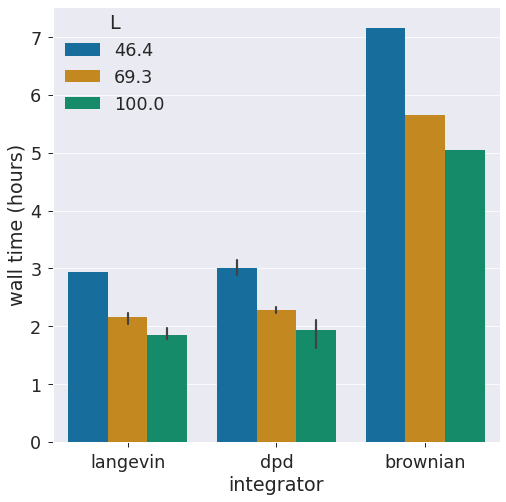

In [29]:
fig, ax1 = plt.subplots(1,1, figsize = (8,8), sharey=True)


sns.barplot(ax = ax1, data = data, x = 'intg', y = 'run_time', hue='L', palette=sns.color_palette('colorblind'))

ax1.set(ylabel = 'wall time (hours)', xlabel = 'integrator')

ax1.legend( title='L', loc = (0.01,0.74))


In [30]:
fig.savefig('./IMAGES/master_technical.png')

In [26]:
# fig.savefig('technical_a.png')

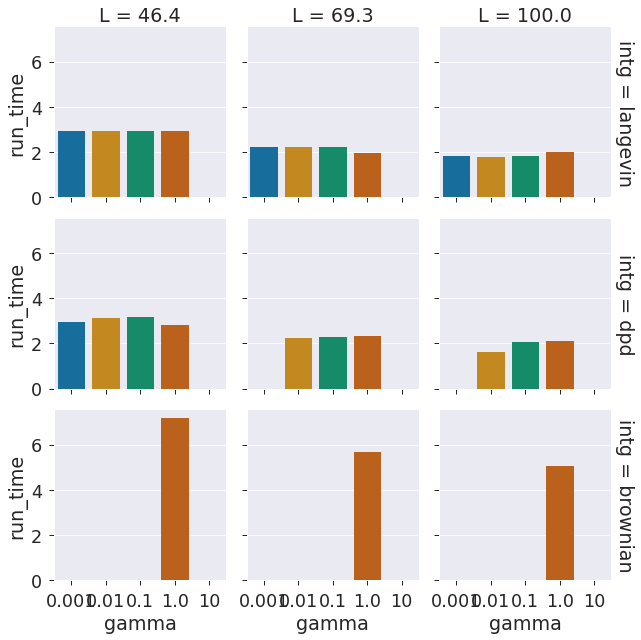

In [31]:
fig2 = sns.FacetGrid(data, row='intg',col='L', margin_titles=True)
fig2.map(sns.barplot,'gamma','wall time (hours)', order=[0.001,0.01,0.1,1.0,10], palette=sns.color_palette('colorblind'))

In [16]:
fig2.savefig('./IMAGES/master_technical_b.png')

In [12]:
new = data[data['intg']!='brownian']

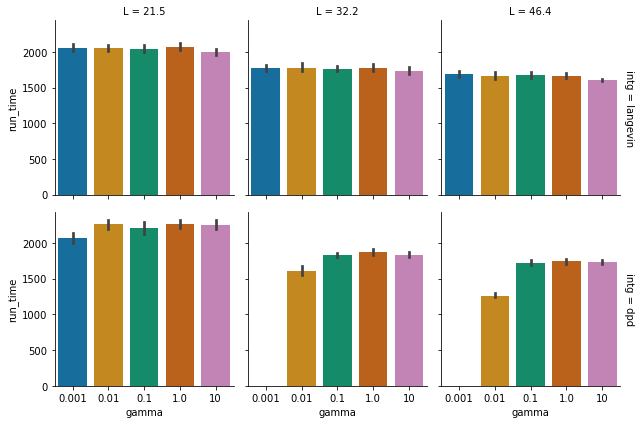

In [14]:
fig3 = sns.FacetGrid(new, row='intg',col='L', margin_titles=True)
fig3.map(sns.barplot,'gamma','run_time', order=[0.001,0.01,0.1,1.0,10], palette=sns.color_palette('colorblind'))

In [17]:
fig3.savefig('./IMAGES/master_technical_c.png')